In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [26]:
bs = 16

In [27]:
path = Path("data/")

In [28]:
path

PosixPath('data')

In [29]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [30]:
import warnings
warnings.filterwarnings('ignore')

In [31]:
fnames = get_image_files(path)
fnames[:5]

[PosixPath('data/Frosted_Flakes_8.jpg'),
 PosixPath('data/Cocoa_Puffs_10.jpg'),
 PosixPath('data/Frosted_Flakes_7.jpg'),
 PosixPath('data/Quaker_Chewy_2.jpg'),
 PosixPath('data/Trix_10.jpg')]

In [32]:
data = ImageDataBunch.from_name_re(path, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs
                                  ).normalize(imagenet_stats)

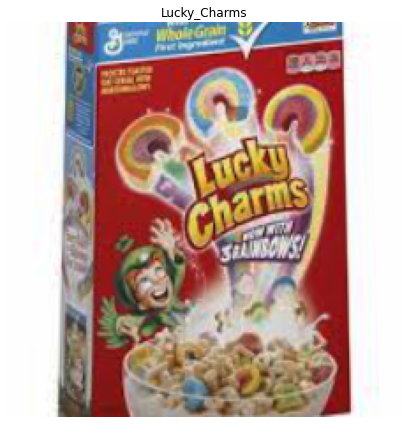

In [33]:
data.show_batch(rows=1, figsize=(7,6))

In [34]:
print(data.classes)

['Cocoa_Puffs', 'Frosted_Flakes', 'Lucky_Charms', 'Quaker_Chewy', 'Trix']


In [35]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [36]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.930433,2.555911,0.727273,00:02
1,2.441482,0.887119,0.363636,00:01
2,1.769993,0.535422,0.272727,00:01
3,1.393038,0.296835,0.090909,00:01


In [37]:
learn.save('stage-1')

In [38]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

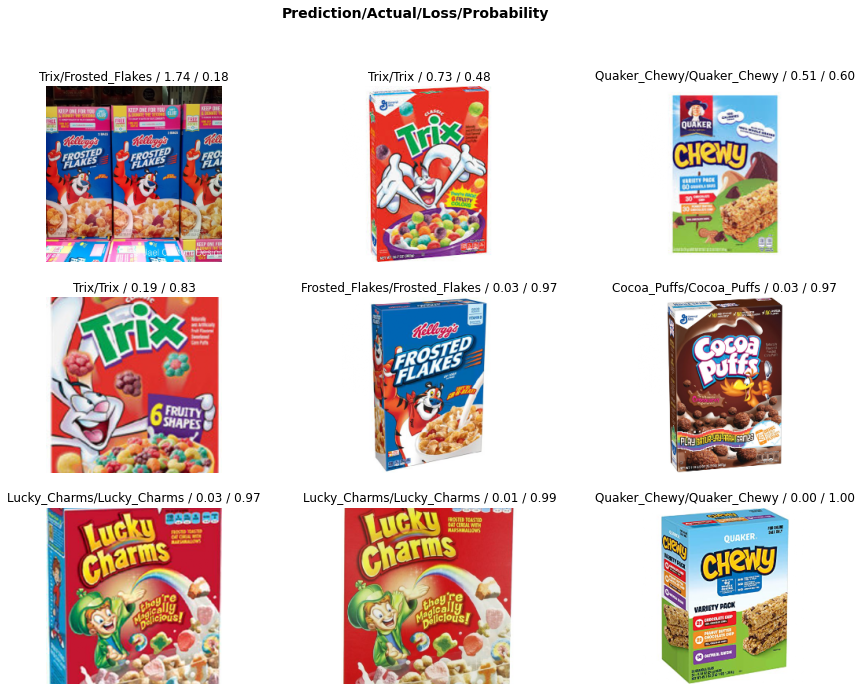

In [39]:
interp.plot_top_losses(9, figsize=(15,11))

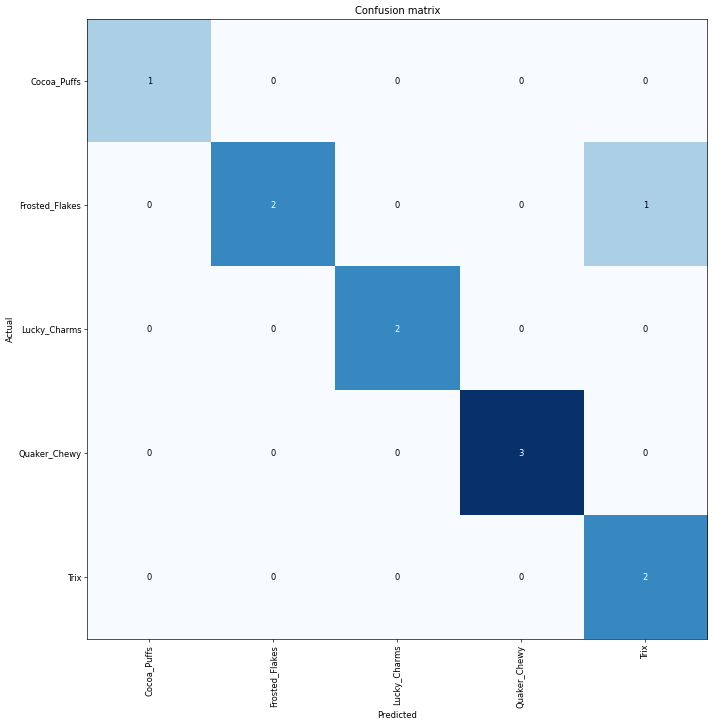

In [40]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [41]:
interp.most_confused(min_val=2)

[]

In [42]:
learn.unfreeze()

In [43]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.240666,0.251329,0.181818,00:01


In [44]:
learn.load('stage-1');

In [45]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


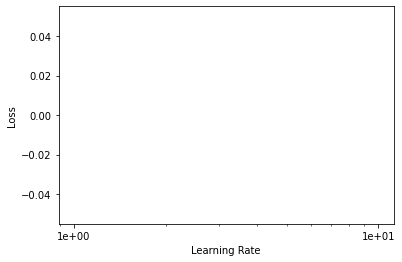

In [46]:
learn.recorder.plot()

In [47]:
data2 = ImageDataBunch.from_name_re(path, fnames, pat, ds_tfms=get_transforms(),
                                   size=299, bs=bs//2).normalize(imagenet_stats)

In [48]:
learn2 = cnn_learner(data2, models.resnet50, metrics=error_rate)

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


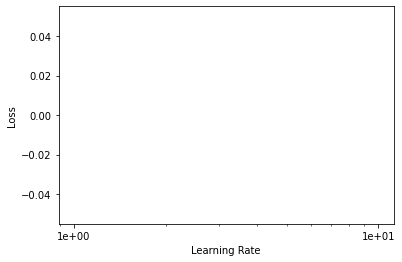

In [52]:
learn2.lr_find()
learn2.recorder.plot()

In [51]:
learn2.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,1.993168,0.940202,0.363636,00:04
1,1.185970,0.160642,0.090909,00:01
2,0.812464,0.021483,0.000000,00:01
3,0.578888,0.004875,0.000000,00:02
4,0.442978,0.005430,0.000000,00:01
5,0.350847,0.018637,0.000000,00:02
6,0.309855,0.019280,0.000000,00:01
7,0.258551,0.020988,0.000000,00:02


In [53]:
learn.save('stage-1-50')

In [54]:
interp2 = ClassificationInterpretation.from_learner(learn2)

In [55]:
interp.most_confused(min_val=2)

[]